# Story Teling With Data 1
## Data Cleaning For Telco (DQlab Weekend Challange)
Dataset Resource : 'https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv'

**Story** :  
DQLab Telco merupakan perusahaan Telco yang sudah mempunyai banyak cabang tersebar dimana-mana. Sejak berdiri pada tahun 2019, DQLab Telco konsisten untuk memperhatikan customer experience nya sehingga tidak akan di tinggalkan pelanggan. Walaupun baru berumur 1 tahun lebih sedikit, DQLab Telco sudah mempunyai banyak pelanggan yang beralih **langganan ke kompetitior**. Pihak management ingin **mengurangi** jumlah pelanggan yang **beralih (churn)** dengan menggunakan machine learning. Oleh karena itu, tim Data Scientist diminta untuk mempersiapkan data sekaligus membuat **model prediksi** yang tepat untuk menentukan pelanggan akan **berhenti berlangganan (churn) atau tidak.

In [1]:
# Import library
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
# Load Dataset
dataset = pd.read_csv('https://dqlab-dataset.s3-ap-southeast-1.amazonaws.com/dqlab_telco.csv');

In [3]:
# Menampilkan tabel 5 Data teratas dari dataset
dataset.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


**Dataset Detail**  
Berdasarkan tabel diatas, terdapat beberapa feature yang memiliki informasi detail sebagai berikut :  
1. `UpdatedAt` Periode of Data taken  
2. `customerID` Customer   
3. `gender` Whether the customer is a male or a female (Male, Female)  
4. `SeniorCitizen` Whether the customer is a senior citizen or not (1, 0)  
5. `Partner` Whether the customer has a partner or not (Yes, No)  
6. `Dependents` Whether the customer has dependents or not (Yes, No)  
7. `tenure` Number of months the customer has stayed with the company  
8. `PhoneServic` Whether the customer has a phone service or not (Yes, No)  
9. `MultipleLines` Whether the customer has multiple lines or not (Yes, No, No phone service)  
10. `InternetService` Customer’s internet service provider (DSL, Fiber optic, No)  
11. `OnlineSecurity` Whether the customer has online security or not (Yes, No, No internet service)  
12. `OnlineBackup` Whether the customer has online backup or not (Yes, No, No internet service)  
13. `DeviceProtection` Whether the customer has device protection or not (Yes, No, No internet service)  
14. `TechSupport` Whether the customer has tech support or not (Yes, No, No internet service)  
15. `StreamingTV` Whether the customer has streaming TV or not (Yes, No, No internet service)  
16. `StreamingMovies` Whether the customer has streaming movies or not (Yes, No, No internet service)  
17. `Contract` The contract term of the customer (Month-to-month, One year, Two year)  
18. `PaperlessBilling` Whether the customer has paperless billing or not (Yes, No)  
19. `PaymentMethod` The customer’s payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))  
20. `MonthlyCharges` The amount charged to the customer monthly  
21. `TotalCharges` The total amount charged to the customer
22. `Churn` Whether the customer churned or not (Yes or No)  

## a. Mengecek dan Mengatasi data duplikat
Dikarenakan kita akan menganalisis apakah customer akan beralih/pergi menggunakan layanan kompetitor, sangat penting untuk memvalidasi data customer pada dataset. Mengecek apakah terdapat data yang duplikat berdasarkan customerID dan jika duplikat perlu dilihat lagi apakah benar-benar sama atau bisa jadi kesalahan ketika pengumpulan data.

In [4]:
# Mendapatkan jumlah baris dan kolom pada data
print('Jumlah baris : ', dataset.shape[0])
print('Jumlah kolom : ', dataset.shape[1])

Jumlah baris :  7113
Jumlah kolom :  22


In [5]:
# Mendapatkan jumlah customer yang unik unik berdasarkan kolom customerID
print('Jumlah data: ', len(dataset.customerID.unique()))

Jumlah data:  7017


Berdasarkan informasi diatas jumlah total data/baris adalah 7113 namun untuk jumlah customerID yang unik 7017 oleh karena bisa diambil kesimpulan bahwa terdapat data duplikat dari dataset yang ada. Oleh karena itu perlu dilakukan analisis lagi untuk mengetahui id customer mana saja yang valid.

In [6]:
# Mendapatkan data yang duplikat berdasarkan customerID
duplicated_data = dataset[dataset.duplicated(['customerID'])]
duplicated_data.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
151,202006,4.54E+11,Male,0,No,No,7.0,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,No,Mailed check,95.00,655.50,Yes
330,202006,4.59E+11,Female,0,Yes,Yes,35.0,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,19.85,739.35,No
406,202006,4.55E+11,Male,0,Yes,Yes,60.0,Yes,Yes,Fiber optic,Yes,No,Yes,No,Yes,No,One year,Yes,Bank transfer (automatic),95.40,5812.00,No
417,202006,4.55E+11,Female,0,Yes,Yes,40.0,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.80,1024.70,No
564,202006,4.57E+11,Male,0,No,No,7.0,Yes,No,DSL,No,No,Yes,Yes,Yes,No,Month-to-month,No,Bank transfer (automatic),64.30,445.95,No


In [7]:
print('Jumlah data yang duplikat : ', duplicated_data.shape[0])

Jumlah data yang duplikat :  96


Berdasarkan tabel diatas dapat diketahui bahwa terdapat 96 data duplikat, yang dimana jika kita mengurangi antara total baris data dikurangi jumlah data yang unik berdasarkan customer hasilnya sama yaitu 96. Namun total 7017 data tersebut adalah data yang hanya dikurangi data duplikatnya. Misalnya customerID 45961764656 ada dua baris pada dataset namun yang di hitung hanya yang awal sementara antara data yang awal dan akhir belum tentu sama persis, oleh karena itu kita akan menghapus semua data yang duplikat karena data tersebut dianggap tidak valid.

In [8]:
# Menghapus semua data yang duplikat berdasarkan kolom customerID dengan tidak
# mempertahankan datanya. Semuanya data duplikat dihapus.
dataset = dataset.drop_duplicates(['customerID'], keep = False)

## b. Mengecek dan Mengatasi Missing Value
Missing value dalam dunia data merupakan hal yang lumrah, sehingga tahapan ini akan selalu ada untuk mengantisipasi adanya missing value yang mungkin akan mempengaruhi hasil analisis/model yang akan dibuat.

In [9]:
# Mendapatkan jumlah data missing value per kolom/atribut
dataset.isna().sum()

UpdatedAt            0
customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure              99
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges      26
TotalCharges        15
Churn               43
dtype: int64

Berdasarkan hasil diatas diketahui terdapat **missing value** pada atribut/kolom tenure, MonthlyCharges, TotalCharges dan Churn. Untuk menangani missing value sebenarnya ada tiga cara yaitu mengabaikan, menghapus data nya atau mengisi datanya (imputasi). Pada analisis ini karena saya akan berfokus pada data preprocessing oleh karena itu kita akan mencoba untuk melakukan imputasi.  

Imputasi merupakan teknik mengisi nilai yang hilang (missing) pada dataset. Untuk mengisi nilainya tidak lah selalu sama tergantung data apa yang hilang. Berdasarkan detail dataset tenure, MonthlyCharges dan TotalCharges merupakan data yang bersifat continue oleh karena itu kita dapat melakukan imputasi menggunakan mean/median, zeros imputation, hot deck imputation, cold deck imputation, regression imputation, stohastic regression dan lainnya (Lihat di : https://medium.com/@vinitasilaparasetty/guide-to-handling-missing-values-in-data-science-37d62edbfdc1).  

Pada **Story Teling With Data** ini saya akan mencoba yang sederhana yaitu menggunakan Mean/Median.  
Sementara itu untuk atribut/kolom Churn karena bersifat kategorikal, maka penanganan imputasinya berbeda, untuk pembahasan ini saya akan coba menggunakan **most frequently value**.

Sebelum menentukan untuk menggunakan Mean atau Median. Sebelumnya perlu diketahui terlebih dahulu apakah terdapat outliers pada data. Jika di dapatkan outliers disarankan lebih baik menggunakan Median (https://chimemoo.github.io/posts/learning-statistics-using-r-for-data-science/).

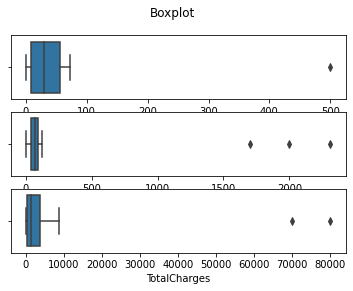

In [10]:
fig, axs = plt.subplots(3)
fig.suptitle('Boxplot')
sns.boxplot(x=dataset['tenure'], ax=axs[0])
sns.boxplot(x=dataset['MonthlyCharges'], ax=axs[1])
sns.boxplot(x=dataset['TotalCharges'], ax=axs[2])

Berdasarkan Boxplot diatas diketahui bahwa terdapat outlier yang sangat jauh, sehingga jika kita mengambil nilai Mean tidak akan mencerminkan nilai tengahnya. Oleh karena itu akan digunakan nilai Median untuk mengimputasi missing valuenya.

In [11]:
# Mendapatkan mean/median
print('Mean : ')
dataset.mean()

Mean : 


UpdatedAt         202006.000000
SeniorCitizen          0.162019
tenure                32.774006
MonthlyCharges        65.808059
TotalCharges        2308.116745
dtype: float64

In [12]:
# Imputasi dengan mengisi nilai na dengan median
dataset['tenure'] = dataset['tenure'].replace(np.nan,dataset['tenure'].median())
dataset['MonthlyCharges'] = dataset['MonthlyCharges'].replace(np.nan,dataset['MonthlyCharges'].median())
dataset['TotalCharges'] = dataset['TotalCharges'].replace(np.nan,dataset['TotalCharges'].median())


Kemudian selanjutnya menangani imputasi pada data kategori yaitu, Churn. Hal pertama yang perlu dilakukan adalah melihat frekuensi jumlah pengguna yang churn atau tidak, hal ini ditujukan untuk menentukan nilai apa yang akan digunakan untuk mengisi nilai kolom Churn yang kosong.

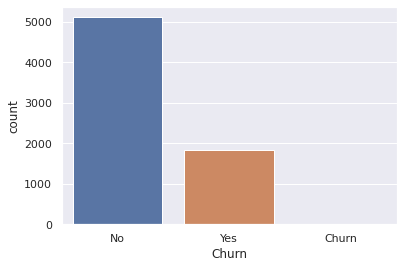

In [13]:
sns.set(style="darkgrid")
ax = sns.countplot(x="Churn", data=dataset)

In [14]:
dataset['Churn'].value_counts()

No       5112
Yes      1829
Churn       9
Name: Churn, dtype: int64

Dari barplot dan hasil diatas diketahui terdapat 3 label, sementara dari detail dataset hanya ada 2 label yaitu Yes dan No. Hal ini bisa disebut inkonsisten oleh karena tidak sesuai. Namun jika melihat dari tujuan data adalah mengetahui cara memisahkan pengguna yang Churn maka label Churn bisa dianggap 'Yes'.  
Selain itu berdasarkan jumlah frekuensi jumlah antara pengguna yang tidak Churn lebih banyak dari pada yang Churn. Jika kita melakukan imputasi pada data yang atribut Churn nya hilang dengan 'No' (Label terbanyak) kita akan semakin sulit untuk mendeteksi pelanggan yang akan Churn. Hal tersebut dikarenakan jumlah data yang kurang seimbang antar label. Oleh karena itu diputuskan untuk menghapus 43 data yang tidak memilki kelas target.

In [15]:
# Mengganti nilai label Churn menjadi Yes
dataset['Churn'] = dataset['Churn'].replace('Churn', 'Yes')

In [16]:
# Menghapus data yang atribut churn nya hilang/missing
dataset = dataset.dropna()

In [17]:
# Melihat kembali apakah missing value masih ada atau tidak
dataset.isna().sum()

UpdatedAt           0
customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

# c. Mengatasi Outliers
Outliers merupakan nilai diluar Q3 dan Q1. Untuk mengatasi outliers ada banyak cara salah satunya menggunakan imputasi seperti yang kita gunakan sebelumnya. Atribut yang memiliki outliers adalah atribut dengan nilai kontinue seperti MonthlyCharges, TotalCharges dan tenure. Pada contoh ini akan digunakan nilai max dan min untuk mengganti nilai outliers.

In [18]:
# Get Maximum and Minimum value
Q1 = (dataset[['tenure', 'TotalCharges', 'MonthlyCharges']]).quantile(0.25)
Q3 = (dataset[['tenure', 'TotalCharges', 'MonthlyCharges']]).quantile(0.75)

IQR = Q3 - Q1
maximum = Q3 + (1.5 * IQR)
print("Nilai maksimum dari masing-masing variabel : ", maximum)
minimum = Q1 - (1.5 * IQR)
print("Nilai minimum dari masing-masing variabel : ", minimum)

Nilai maksimum dari masing-masing variabel :  tenure             124.00000
TotalCharges      8861.06875
MonthlyCharges     169.93125
dtype: float64
Nilai minimum dari masing-masing variabel :  tenure             -60.00000
TotalCharges     -4667.38125
MonthlyCharges     -43.61875
dtype: float64


In [19]:
# Delete Outliers
more_than = (dataset > maximum)
lower_than = (dataset < minimum)

dataset = dataset.mask(more_than, maximum, axis=1)
dataset = dataset.mask(lower_than, minimum, axis=1)

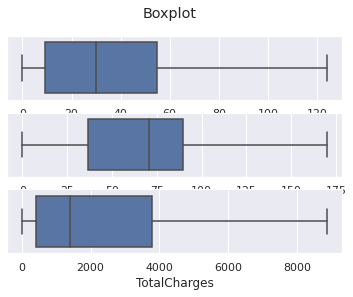

In [20]:
# Melihat kembali hasilnya
fig, axs = plt.subplots(3)
fig.suptitle('Boxplot')
sns.boxplot(x=dataset['tenure'], ax=axs[0])
sns.boxplot(x=dataset['MonthlyCharges'], ax=axs[1])
sns.boxplot(x=dataset['TotalCharges'], ax=axs[2])

## d. Mengatasi nilai tidak konsisten/standarisasi
Mengubah value yang tidak sesuai dengan standar yang dijelaskan pada detail dataset.

In [21]:
# Melihat value pada atribut gender
dataset['gender'].value_counts()

Male         3501
Female       3429
Wanita         14
Laki-Laki       6
Name: gender, dtype: int64

In [22]:
# Melihat value pada atribut Dependents
dataset['Dependents'].value_counts()

No     4872
Yes    2058
Iya      20
Name: Dependents, dtype: int64

In [23]:
# Standarisasi nilai
dataset['gender'] = dataset['gender'].replace('Wanita', 'Female')
dataset['gender'] = dataset['gender'].replace('Laki-Laki', 'Male')
dataset['Dependents'] = dataset['Dependents'].replace('Iya', 'Yes')

# Hasil dataset yang sudah dilakukan data cleaning

In [24]:
# Data
dataset.head()

,UpdatedAt,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,202006,45759018157,Female,0,Yes,No,1.0,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,202006,45557574145,Male,0,No,No,34.0,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,202006,45366876421,Male,0,No,No,2.0,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,202006,45779536532,Male,0,No,No,45.0,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,202006,45923787906,Female,0,No,No,2.0,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [25]:
# Shape Data
dataset.shape

(6950, 22)